In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression

In [2]:
sonar_df = pd.read_csv('sonar.csv', header= None)

In [3]:
sonar_df.shape

(208, 61)

In [4]:
sonar_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R


In [5]:
sonar_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 208 entries, 0 to 207
Data columns (total 61 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       208 non-null    float64
 1   1       208 non-null    float64
 2   2       208 non-null    float64
 3   3       208 non-null    float64
 4   4       208 non-null    float64
 5   5       208 non-null    float64
 6   6       208 non-null    float64
 7   7       208 non-null    float64
 8   8       208 non-null    float64
 9   9       208 non-null    float64
 10  10      208 non-null    float64
 11  11      208 non-null    float64
 12  12      208 non-null    float64
 13  13      208 non-null    float64
 14  14      208 non-null    float64
 15  15      208 non-null    float64
 16  16      208 non-null    float64
 17  17      208 non-null    float64
 18  18      208 non-null    float64
 19  19      208 non-null    float64
 20  20      208 non-null    float64
 21  21      208 non-null    float64
 22  22

In [6]:
sonar_df.isnull().sum()

0     0
1     0
2     0
3     0
4     0
     ..
56    0
57    0
58    0
59    0
60    0
Length: 61, dtype: int64

In [7]:
sonar_df.duplicated().sum()

0

In [8]:
sonar_df.iloc[:, -1].value_counts()

60
M    111
R     97
Name: count, dtype: int64

In [9]:
sonar_df.iloc[:, -1].replace({'M':0, 'R':1}, inplace= True)

C:\Users\ravad\AppData\Local\Temp\ipykernel_1188\546445121.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sonar_df.iloc[:, -1].replace({'M':0, 'R':1}, inplace= True)
C:\Users\ravad\AppData\Local\Temp\ipykernel_1188\546445121.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  sonar_df.iloc[:, -

In [10]:
sonar_df.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
31,0.0084,0.0153,0.0291,0.0432,0.0951,0.0752,0.0414,0.0259,0.0692,0.1753,...,0.0236,0.0114,0.0136,0.0117,0.0060,0.0058,0.0031,0.0072,0.0045,1
165,0.0221,0.0065,0.0164,0.0487,0.0519,0.0849,0.0812,0.1833,0.2228,0.1810,...,0.0089,0.0051,0.0015,0.0075,0.0058,0.0016,0.0070,0.0074,0.0038,0
185,0.0340,0.0625,0.0381,0.0257,0.0441,0.1027,0.1287,0.1850,0.2647,0.4117,...,0.0141,0.0019,0.0067,0.0099,0.0042,0.0057,0.0051,0.0033,0.0058,0
194,0.0392,0.0108,0.0267,0.0257,0.0410,0.0491,0.1053,0.1690,0.2105,0.2471,...,0.0083,0.0080,0.0026,0.0079,0.0042,0.0071,0.0044,0.0022,0.0014,0
132,0.0968,0.0821,0.0629,0.0608,0.0617,0.1207,0.0944,0.4223,0.5744,0.5025,...,0.0073,0.0081,0.0303,0.0190,0.0212,0.0126,0.0201,0.0210,0.0041,0


In [11]:
sonar_df.iloc[:, -1].value_counts()

60
0    111
1     97
Name: count, dtype: int64

SPLITTING THE DATASET

In [12]:
x_train, x_test, y_train, y_test = train_test_split(sonar_df.iloc[:, 0:-1], sonar_df.iloc[:, -1], test_size= 0.1, random_state= 20, stratify= sonar_df.iloc[:, -1])

In [13]:
print('x train shape is:', x_train.shape)
print('x test shape is:', x_test.shape)
print('y train shape is:', y_train.shape)
print('y test shape is:', y_test.shape)

x train shape is: (187, 60)
x test shape is: (21, 60)
y train shape is: (187,)
y test shape is: (21,)


In [14]:
y_train.value_counts()

60
0    100
1     87
Name: count, dtype: int64

In [15]:
y_test.value_counts()

60
0    11
1    10
Name: count, dtype: int64

In [16]:
lg= LogisticRegression()
lg.fit(x_train, y_train)
y_pred= lg.predict(x_test)

In [17]:
print('accuracy score of y_pred is:', accuracy_score(y_test, y_pred))

accuracy score of y_pred is: 0.8571428571428571


In [18]:
print(y_test.head(5))

41     1
65     1
168    0
206    0
25     1
Name: 60, dtype: int64


In [19]:
y_pred

array([1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0],
      dtype=int64)

In [20]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.82      0.86        11
           1       0.82      0.90      0.86        10

    accuracy                           0.86        21
   macro avg       0.86      0.86      0.86        21
weighted avg       0.86      0.86      0.86        21



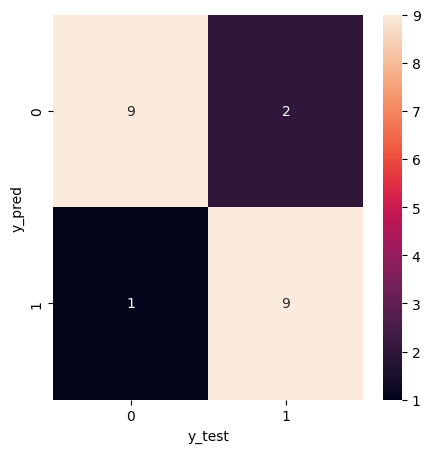

In [21]:
plt.figure(figsize= (5,5))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot= True)
plt.xlabel('y_test')
plt.ylabel('y_pred')
plt.show()

The Accuracy Score Using Logistic Regression Model is 85%

*PREDICTIVE SYSTEM*

In [46]:
import numpy as np

input_data = (
    0.0114,0.0222,0.0269,0.0384,0.1217,0.2062,0.1489,0.0929,0.1350,0.1799,0.2486,
    0.2973,0.3672,0.4394,0.5258,0.6755,0.7402,0.8284,0.9033,0.9584,1.0000,0.9982,
    0.8899,0.7493,0.6367,0.6744,0.7207,0.6821,0.5512,0.4789,0.3924,0.2533,0.1089,
    0.1390,0.2551,0.3301,0.2818,0.2142,0.2266,0.2142,0.2354,0.2871,0.2596,0.1925,0.1256,0.1003,0.0951,0.1210,
    0.0728,0.0174,0.0213,0.0269,0.0152,0.0257,0.0097,0.0041,0.0050,0.0145,0.0103,0.0025
)

arr_data = np.asarray(input_data)
arr_shaped = arr_data.reshape(1, -1)
pred_val= lg.predict(arr_shaped)
#print(pred_val)
if pred_val==0:
    print('it is mine')
else:
    print('it is rock')

it is mine
